id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       16

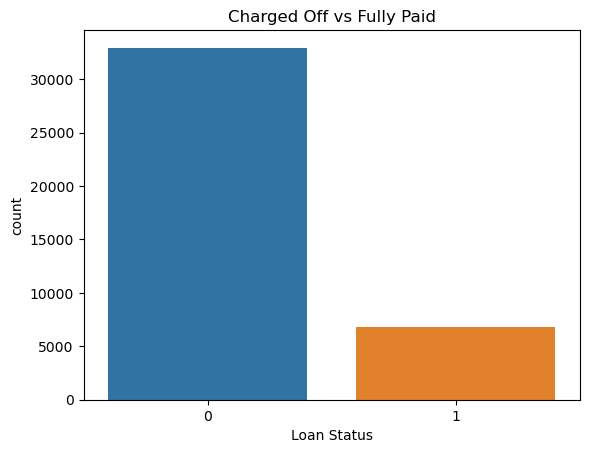

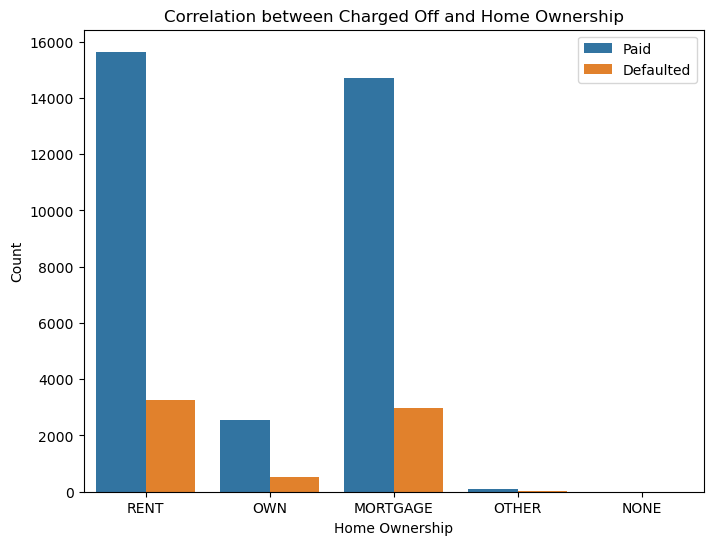

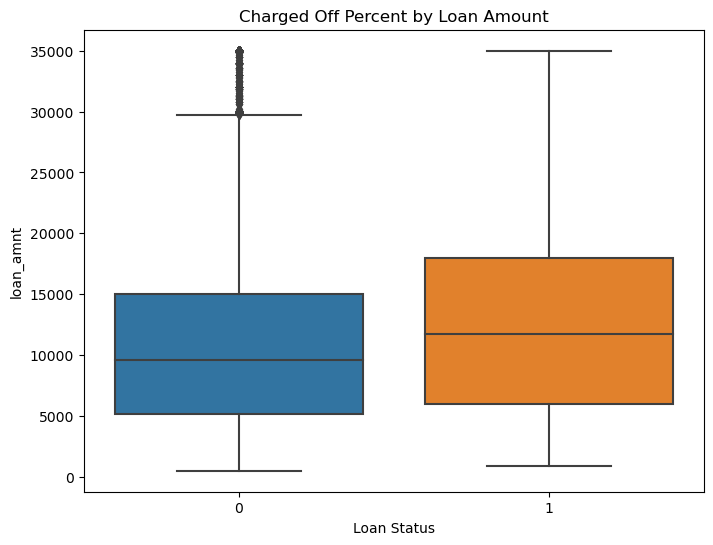

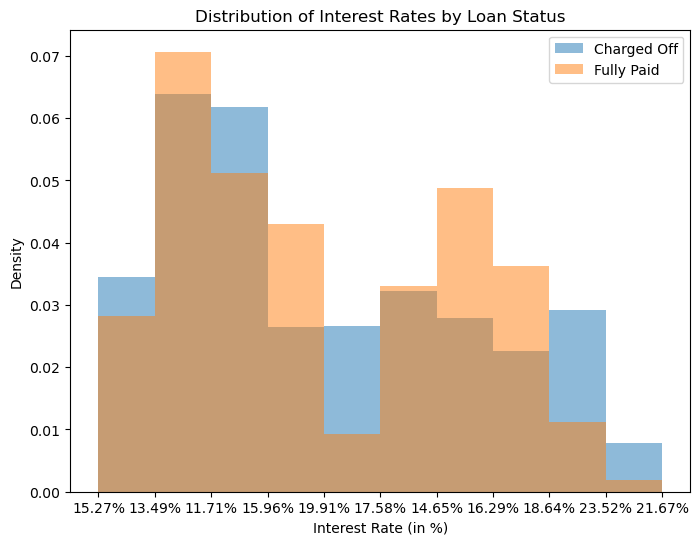

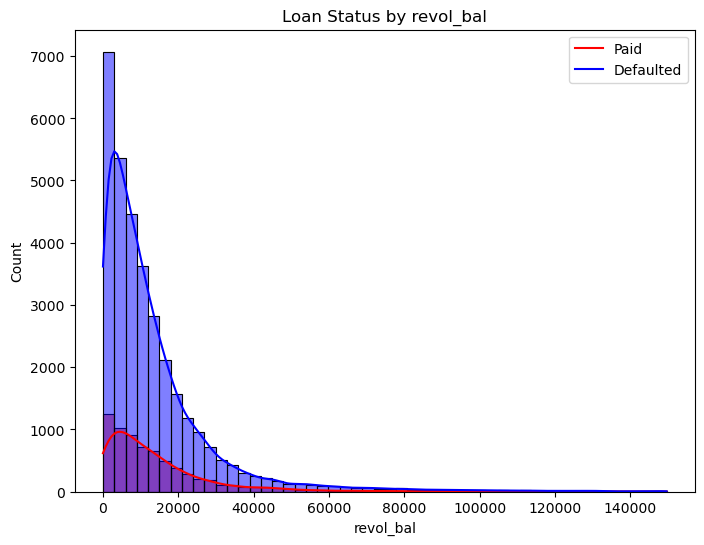

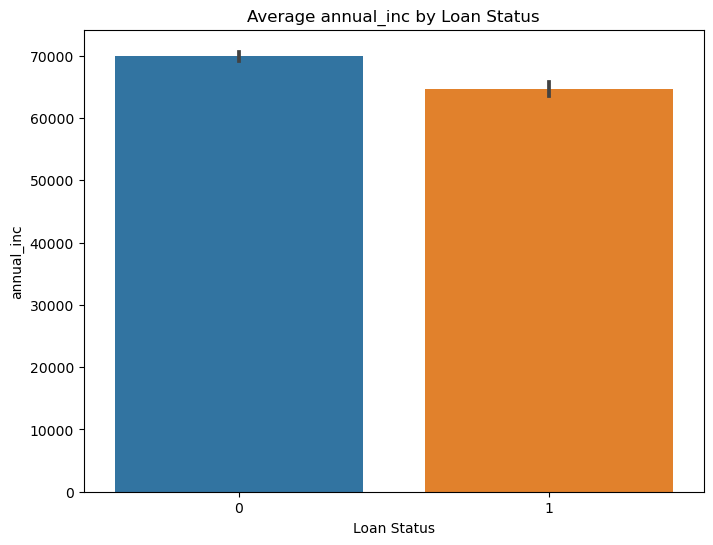

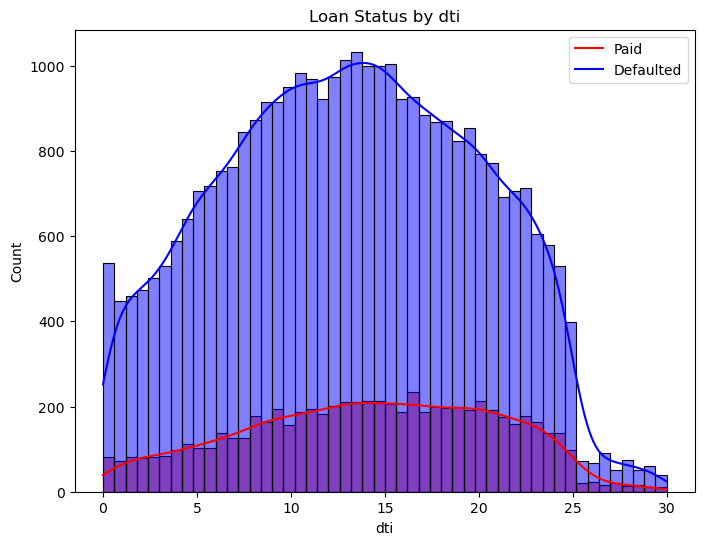

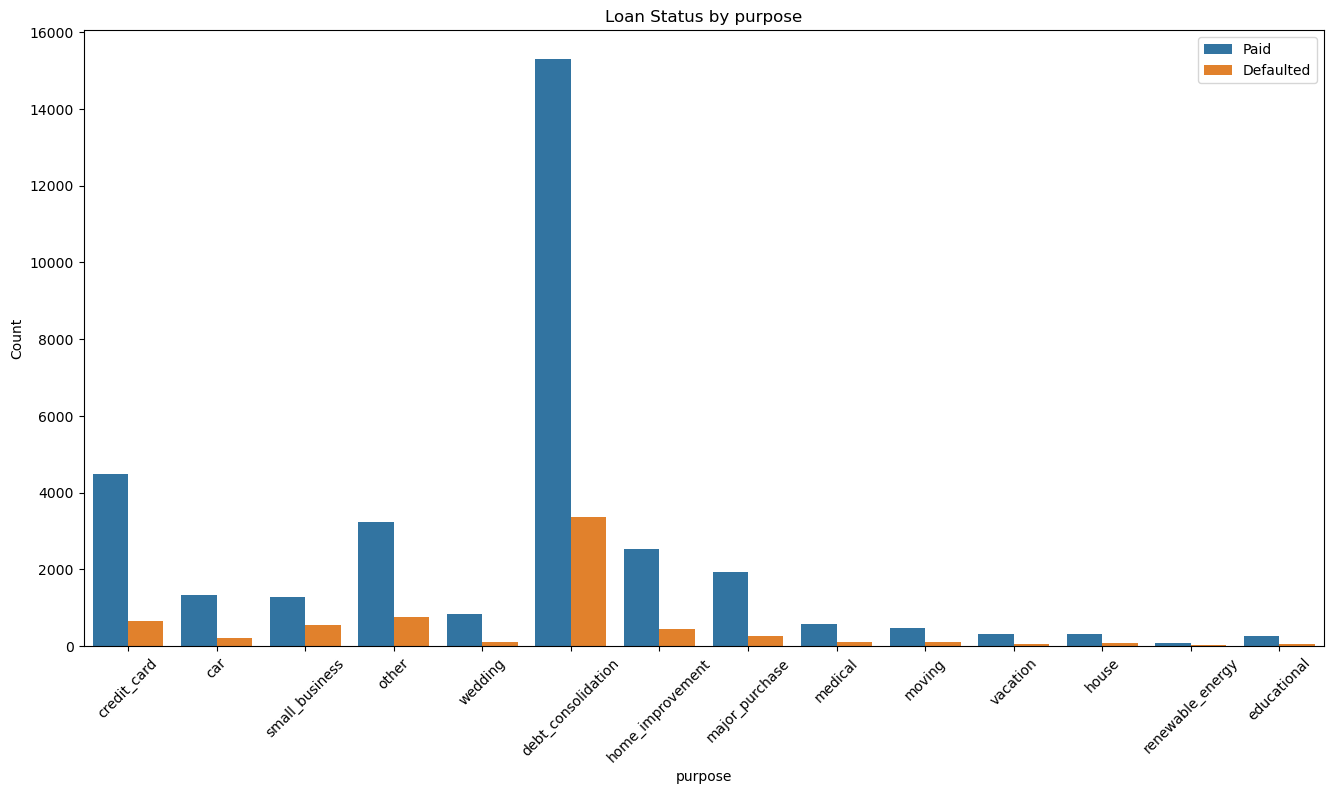

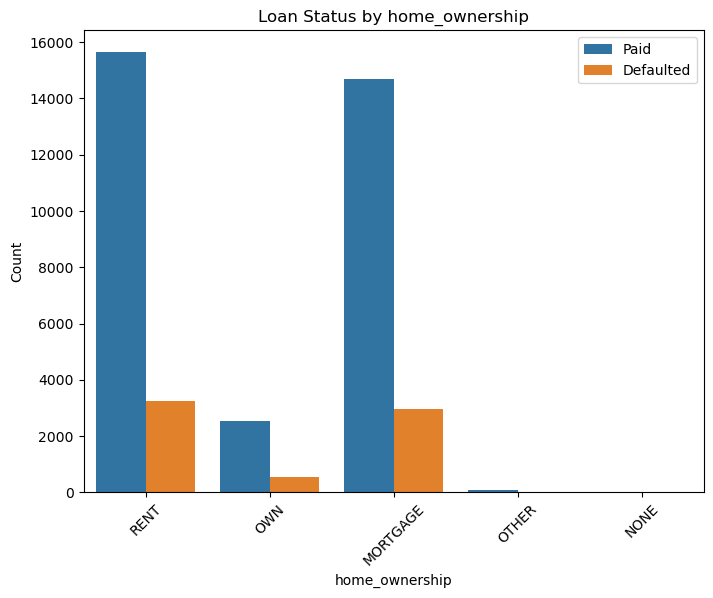

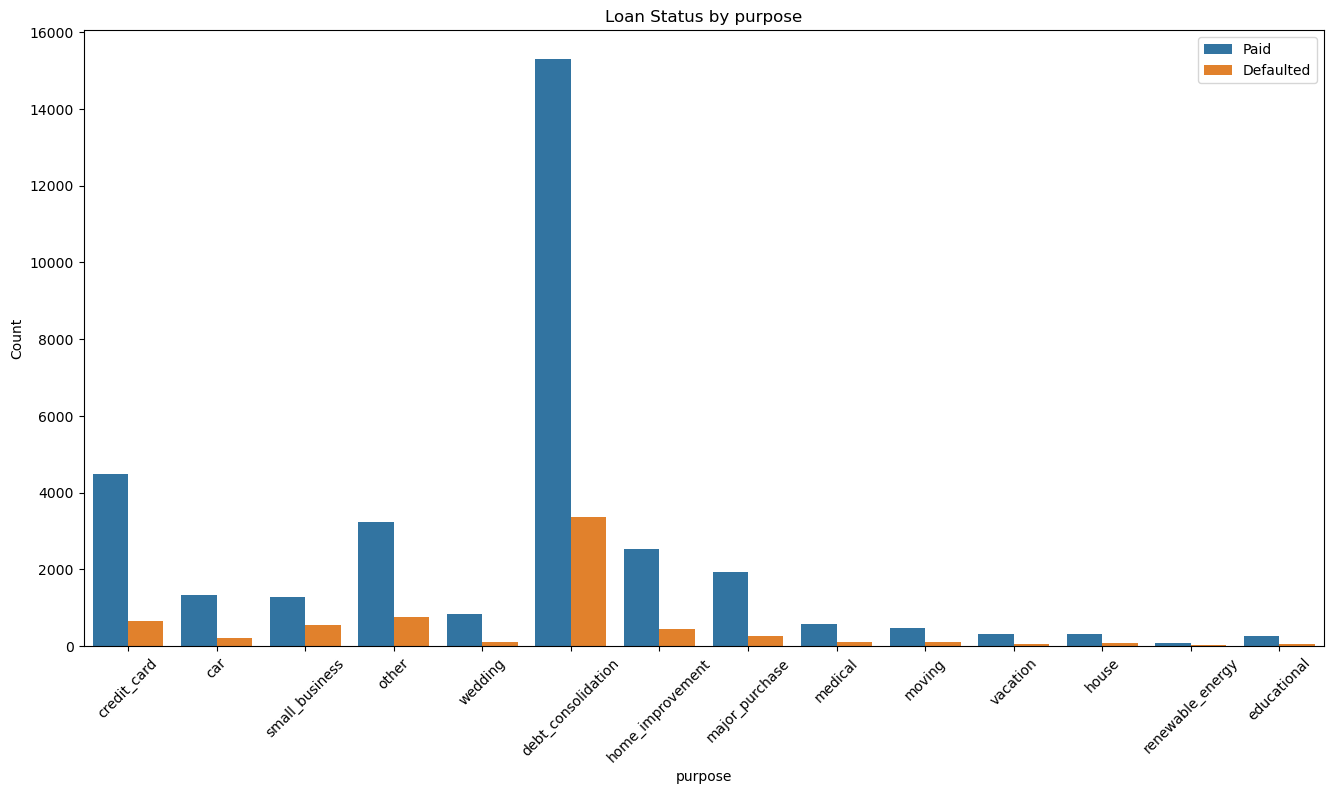

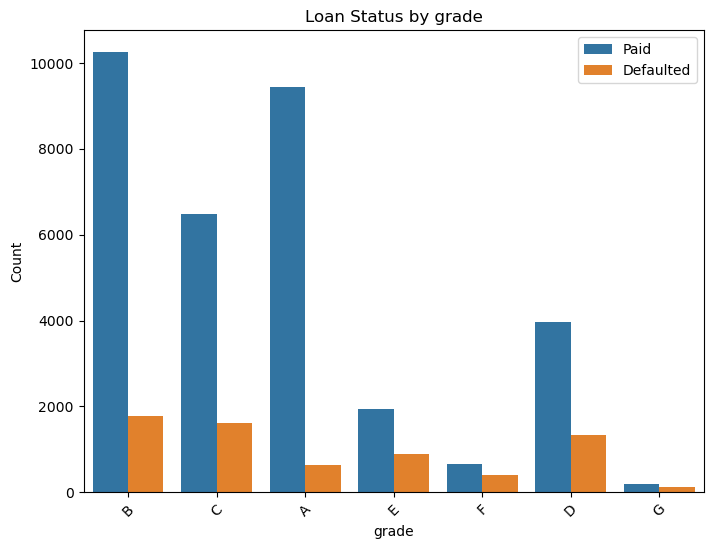

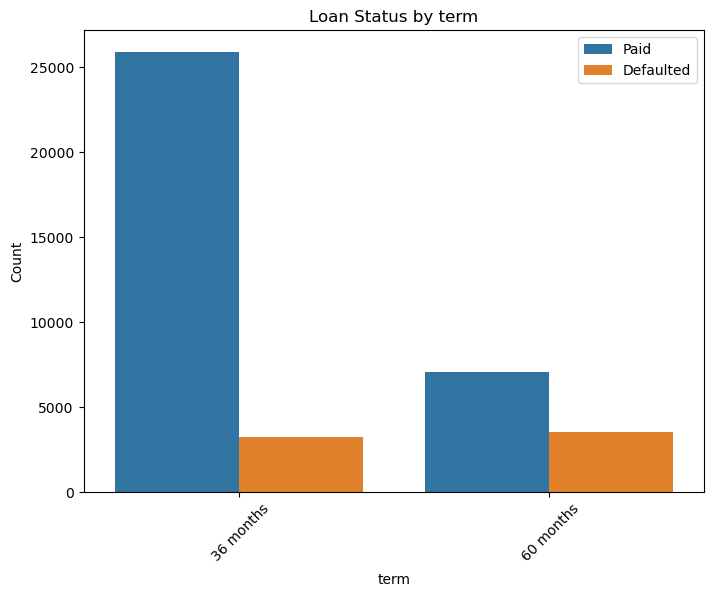

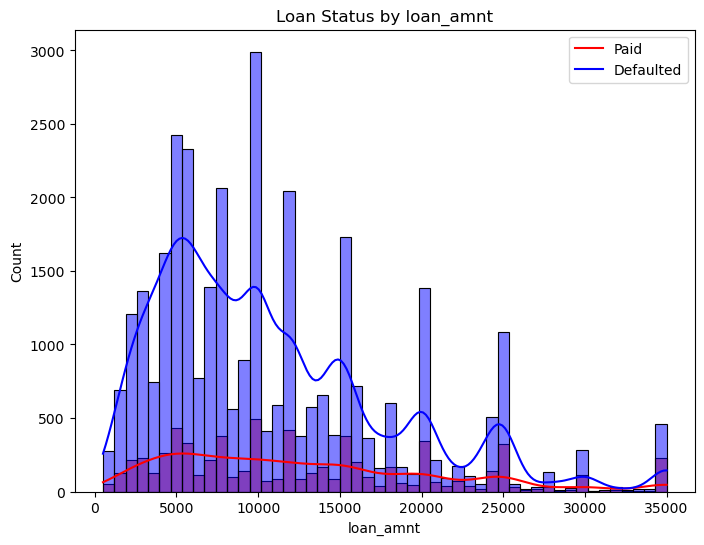

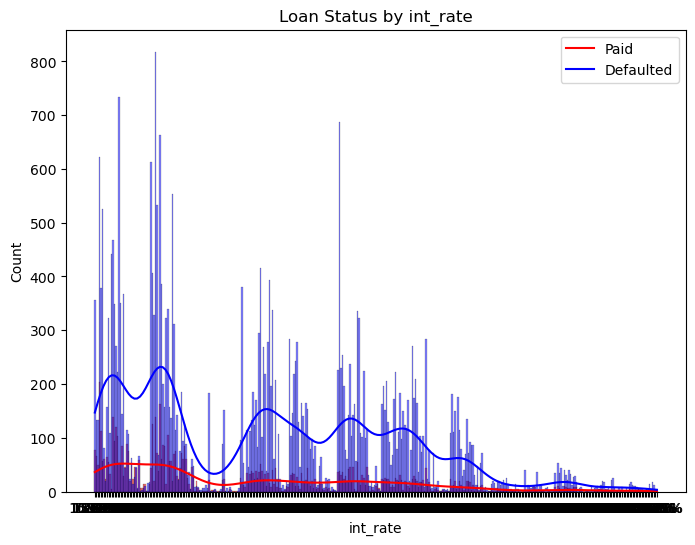

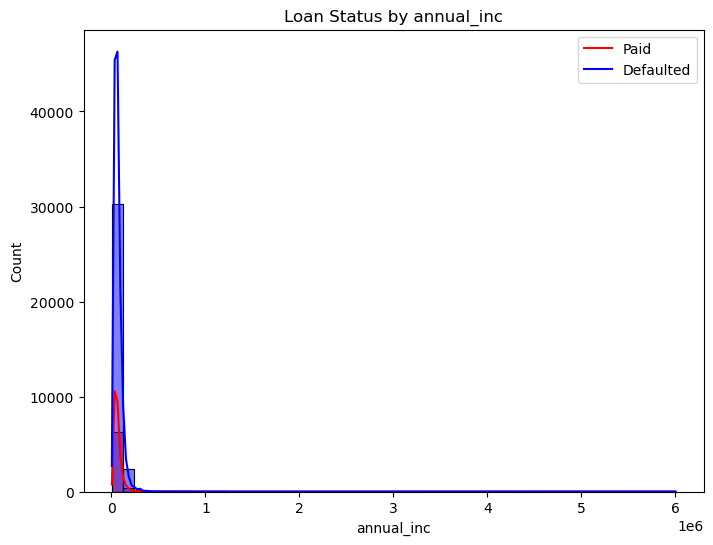

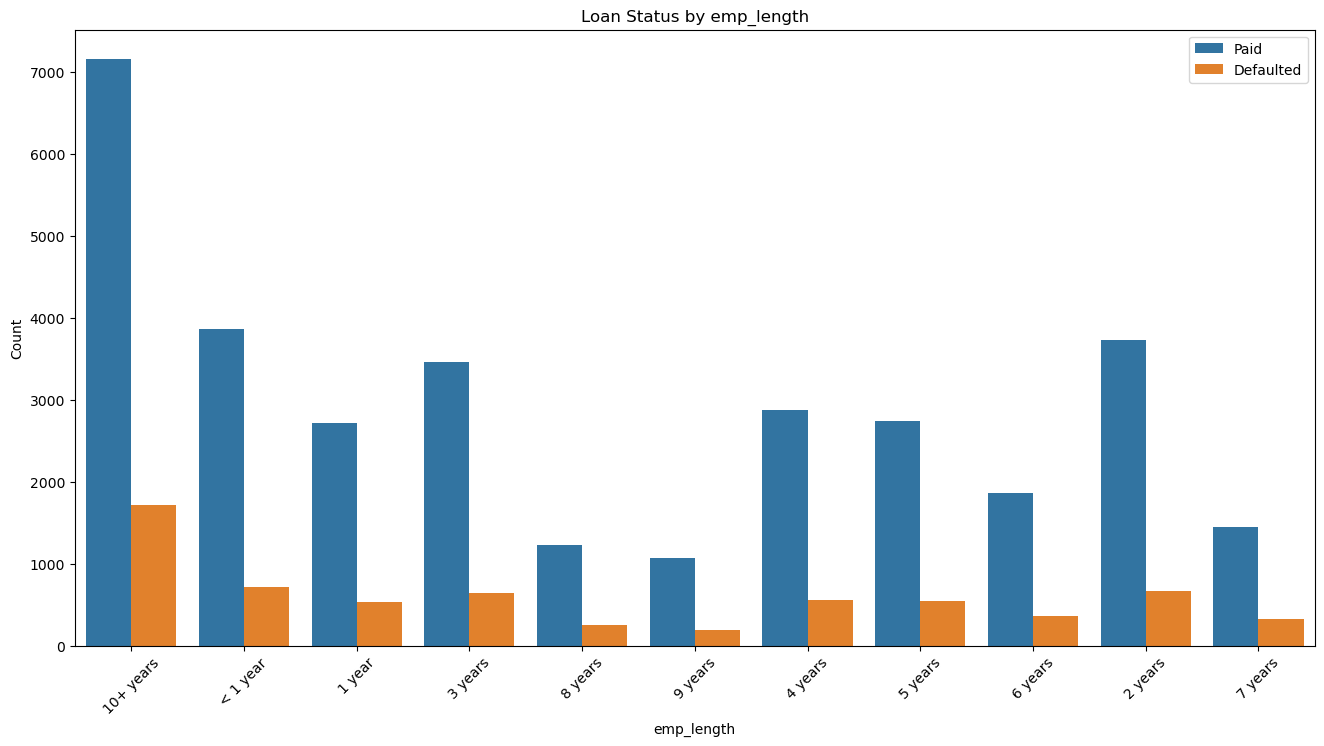

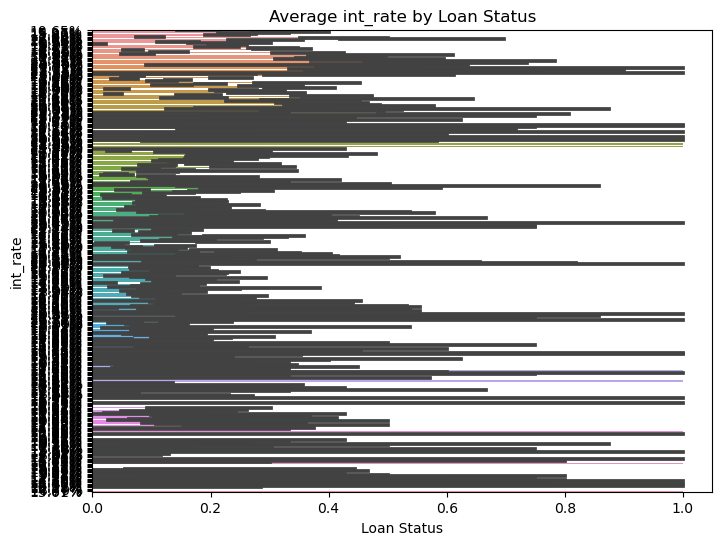

In [4]:
# Import required libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

# Load dataset
loans = pd.read_csv('C:/Users/nimis/OneDrive/Documents/Case Study/Lending club/loan/loan.csv', low_memory=False) # reads CSV file into a DataFrame called loans

# Check data types of columns
print(loans.dtypes) # prints data types of all columns in loans

# Convert loan status to numerical
loans['loan_status'] = np.where(loans['loan_status'] == 'Fully Paid', 0, 1) # converts loan_status column from categorical to numerical, where 0 represents 'Fully Paid' and 1 represents 'Charged Off'

# Check the first few rows of the dataset
print(loans.head()) # prints first five rows of loans DataFrame

# Exploratory data analysis
# Charged off vs Fully paid
loans['loan_status'].value_counts(normalize=True) # calculates and prints the percentage of loans that were 'Charged Off' and 'Fully Paid'
sns.countplot(x='loan_status', data=loans) # creates a bar plot showing the counts of 'Charged Off' and 'Fully Paid' loans
plt.title('Charged Off vs Fully Paid') # sets title for the plot
plt.xlabel('Loan Status') # sets label for x-axis
plt.show() # displays the plot

# Correlation between Charged Off and home ownership
plt.figure(figsize=(8, 6)) # sets the size of the plot
sns.countplot(x='home_ownership', hue='loan_status', data=loans) # creates a bar plot showing the counts of 'Charged Off' and 'Fully Paid' loans for each category of 'home_ownership'
plt.title('Correlation between Charged Off and Home Ownership') # sets title for the plot
plt.xlabel('Home Ownership') # sets label for x-axis
plt.ylabel('Count') # sets label for y-axis
plt.legend(['Paid','Defaulted']) # adds legend to the plot
plt.show() # displays the plot

# Charged off % by loan amount
plt.figure(figsize=(8, 6)) # sets the size of the plot
sns.boxplot(x='loan_status', y='loan_amnt', data=loans) # creates a box plot showing the distribution of loan amounts for 'Charged Off' and 'Fully Paid' loans
plt.title('Charged Off Percent by Loan Amount') # sets title for the plot
plt.xlabel('Loan Status') # sets label for x-axis
plt.show() # displays the plot

# Higher the interest rate leads to higher charged off%
plt.figure(figsize=(8,6))
bins = [i for i in range(0, 31, 3)] # create 10 bins with integer intervals
charged_off = loans.loc[loans['loan_status']==1, 'int_rate'].dropna() # remove NaN values
fully_paid = loans.loc[loans['loan_status']==0, 'int_rate'].dropna() # remove NaN values
plt.hist(charged_off, bins=bins, alpha=0.5, label='Charged Off', density=True)
plt.hist(fully_paid, bins=bins, alpha=0.5, label='Fully Paid', density=True)
plt.legend(loc='upper right')
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Density')
plt.xticks(bins)
plt.title('Distribution of Interest Rates by Loan Status')
plt.show()

# define a function to plot univariate categorical variable
def Univariate_Categorical(column, figsize=(8,6)):
    plt.figure(figsize=figsize)  # create a new figure with the given size
    sns.countplot(x=column, hue='loan_status', data=loans)  # create a countplot of the specified column, grouped by loan status
    plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
    plt.xlabel(column)  # set x-axis label
    plt.ylabel('Count')  # set y-axis label
    plt.title('Loan Status by '+column)  # set plot title
    plt.legend(['Paid','Defaulted'])  # add legend

# define a function to plot univariate numerical variable
def Univariate_Numerical(column, bins=50, figsize=(8,6)):
    plt.figure(figsize=figsize)  # create a new figure with the given size
    sns.histplot(x=column, hue='loan_status', data=loans, bins=bins, alpha=0.5, kde=True, palette=['blue', 'red'])  # create a histogram of the specified column, grouped by loan status, with the specified number of bins, transparency, kernel density estimation, and color palette
    plt.xlabel(column)  # set x-axis label
    plt.ylabel('Count')  # set y-axis label
    plt.title('Loan Status by '+column)  # set plot title
    plt.legend(['Paid','Defaulted'])  # add legend

# Bivariate categorical variable plot
def Bivariate_Categorical(column, figsize=(8,6)):
    plt.figure(figsize=figsize)  # create a new figure with the given size
    sns.countplot(x=column, hue='loan_status', data=loans)  # create a countplot of the specified column, grouped by loan status
    plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
    plt.xlabel(column)  # set x-axis label
    plt.ylabel('Count')  # set y-axis label
    plt.title('Loan Status by '+column)  # set plot title
    plt.legend(['Paid','Defaulted'])  # add legend

# Bivariate numerical variable plot
def Bivariate_Numerical(column, figsize=(8,6)):
    plt.figure(figsize=figsize)  # create a new figure with the given size
    sns.barplot(x='loan_status', y=column, data=loans)  # create a barplot of the specified column against loan status
    plt.xlabel('Loan Status')  # set x-axis label
    plt.ylabel(column)  # set y-axis label
    plt.title('Average '+column+' by Loan Status')  # set plot title
    plt.show()  # display the plot

# The higher the revolving balance, the greater the likelihood of the loan defaulting
Univariate_Numerical('revol_bal')  # call Univariate_Numerical function to plot revolving balance

# bivariate relationship between annual income and loan amount
Bivariate_Numerical('annual_inc')  # call Bivariate_Numerical function to plot annual income against loan amount

# Find the repayment according to income
Univariate_Numerical('dti')  # call Univariate_Numerical function to plot debt-to-income ratio

# Findout the higher charged off
Univariate_Categorical('purpose', figsize=(16,8))  # call Univariate_Categorical function to plot purpose of loan, grouped by loan status, with a larger figure size

# Correlation between Charged Off and home ownership
Univariate_Categorical('home_ownership')  # call Univariate_Categorical function to plot home ownership, grouped by loan status

# Correlation between Charged Off and purpose of loan
Univariate_Categorical('purpose', figsize=(16,8))  # call Univariate_Categorical function to plot purpose of loan, grouped by loan status, with a larger figure size

# Correlation between Charged Off and grade of loan
Univariate_Categorical('grade')  # call Univariate_Categorical function to plot grade of loan, grouped by loan status

# Correlation between Charged Off and loan term
Univariate_Categorical('term') # This code calls the Univariate_Categorical function to create a countplot of loan status by loan term. It shows the number of loans that were paid off versus those that defaulted for each loan term (36 or 60 months).

# Correlation between Charged Off and loan amount
Univariate_Numerical('loan_amnt') # calls the Univariate_Numerical function to create a histogram of loan amount by loan status. It shows the distribution of loan amounts for both paid and defaulted loans.


# Correlation between Charged Off and interest rate
Univariate_Numerical('int_rate') # calls the Univariate_Numerical function to create a histogram of interest rates by loan status. It shows the distribution of interest rates for both paid and defaulted loans.


# Correlation between Charged Off and annual income
Univariate_Numerical('annual_inc') # calls the Univariate_Numerical function to create a histogram of annual income by loan status. It shows the distribution of annual incomes for both paid and defaulted loans.


# Correlation between Charged Off and employment length
Univariate_Categorical('emp_length', figsize=(16,8)) # calls the Univariate_Categorical function to create a countplot of loan status by employment length. It shows the number of loans that were paid off versus those that defaulted for each length of employment.


# Correlation between loan amount and interest rate by loan status
Bivariate_Numerical('int_rate') # calls the Bivariate_Numerical function to create a scatterplot of loan amount and interest rate by loan status. It shows how loan amount and interest rate are related for both paid and defaulted loans.

In [2]:
# import statements
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') 

In [3]:
# read csv file 
loan= pd.read_csv('C:/Users/ANUJA/Desktop/caseStudy/Loan/loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#information of load csv file
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# shape of loan.csv file count of number of rows and columns 
loan.shape

(39717, 111)

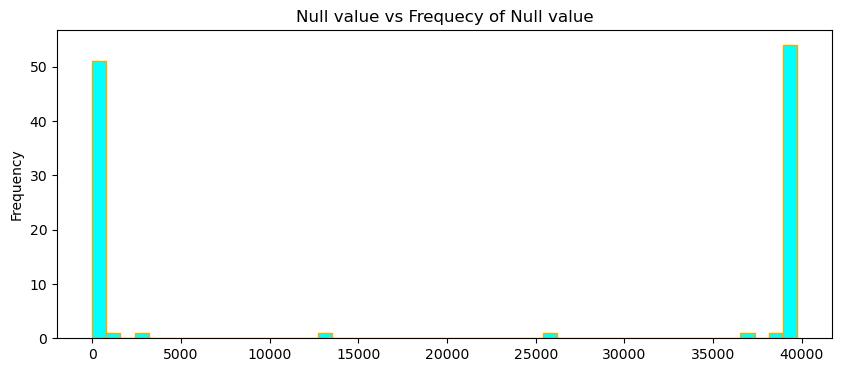

In [6]:
#graph to show the null value count 
col = loan.isnull().sum()
col.plot(kind='hist', bins=50, figsize = (10,4),edgecolor="orange",color="cyan")
plt.title("Null value vs Frequecy of Null value")
plt.show()

In [7]:
#we see there are few columns above 10K mark, Just giving the count how many are above 10000
col.loc[(col.values > 10000) & (col.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [8]:
# There are some Null values as well, drop columns having Null values
loan.drop(columns=list(col[col.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

In [9]:
#Find Max after skipping null values
r = loan.isnull().sum(axis=1) / len(loan.columns)
max(r.values)

0.09433962264150944

In [10]:
# to find out unique and single values 
column_unique = loan.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [11]:
#look for single value and drop 
col1 = column_unique[column_unique.values == 1]
col1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [12]:
#drop values
loan.drop(columns = list(col1.index), inplace=True)
loan.shape

(39717, 44)

In [13]:
#To Know which applications are risky, and get the count
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=del_cols, inplace=True)
loan.shape

(39717, 28)

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [15]:
#get details like min max count
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [16]:
#get loan status
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

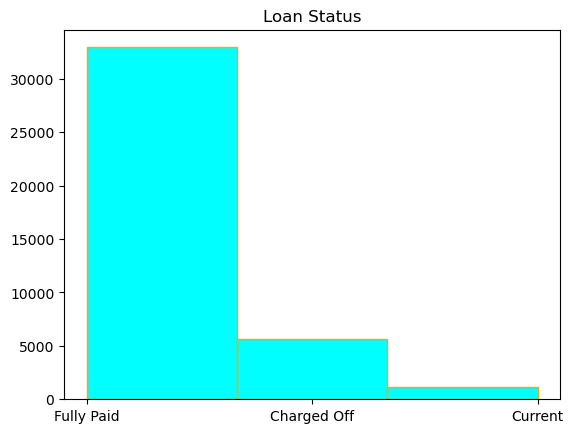

In [17]:
#to show graph of loan status
plt.hist(loan['loan_status'],bins=3,edgecolor="orange",color="cyan")
plt.title("Loan Status")
plt.show()

In [18]:
#dropping current value 
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 28)

In [19]:
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [20]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [21]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

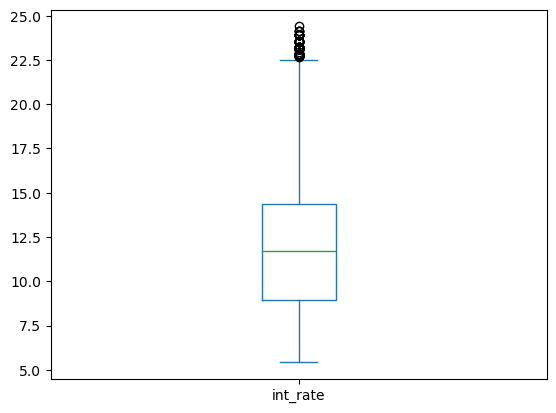

In [22]:
loan['int_rate'].plot.box()
plt.show()

In [23]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [24]:
#get sub_grade column counts
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [25]:
#get first 5 emp_title
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64
(28028,)


In [26]:
#findout the emp_length
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [27]:
loan['emp_length'].isnull().sum()

1033

In [28]:
#get loan columns 
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
#home_ownership counts
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [30]:
#verification status 
loan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [31]:
#split month and year 
m, y = loan['issue_d'].str.split('-').str
y.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [32]:
m.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

In [33]:
#add new column like issued_year and issued_month
loan['issue_y'] = pd.to_numeric(y)
loan['issue_m'] = m
loan.drop(columns=['issue_d'], inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,1,3,0,13648,83.70%,9,0.0,11,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,3,0,1687,9.40%,4,0.0,11,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Nov-01,2,2,0,2956,98.50%,10,0.0,11,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,1,10,0,5598,21%,37,0.0,11,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,3,9,0,7963,28.30%,12,0.0,11,Dec


In [34]:
#get clount of reason of loan 
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [35]:
len(loan['title'].value_counts())

19297

In [36]:
loan['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [37]:
#drop unique values
loan.drop(columns=['title'], inplace=True)

In [38]:
#state Wise count
loan['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [39]:
#earliest_cr_line count
loan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [40]:
#separate year wise 
m, y = loan['earliest_cr_line'].str.split('-').str
y.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

In [41]:
from datetime import datetime
today = datetime.today()
today.year

2023

In [42]:
#get the exact year as the year format is different in many 
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-22")

97

In [43]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9527.981647
std       2491.854695
min       5240.000000
25%       7858.000000
50%       9077.000000
75%      10689.000000
max      28190.000000
Name: days_from_earliest_cr_line, dtype: float64

In [44]:
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [45]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [46]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 385

In [47]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,issue_y,days_from_earliest_cr_line
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.043479,10.309070,9527.981647
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.204583,0.882658,2491.854695
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,7.000000,5240.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.000000,10.000000,7858.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.000000,11.000000,9077.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.000000,11.000000,10689.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,11.000000,28190.000000


In [48]:
#percentage of loans paid vs charged off
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [49]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,3,0,13648,83.70%,9,0.0,11,Dec,13945,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,3,0,1687,9.40%,4,0.0,11,Dec,8742,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2,0,2956,98.50%,10,0.0,11,Dec,7797,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10,0,5598,21%,37,0.0,11,Dec,9897,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,9,0,7963,28.30%,12,0.0,11,Dec,6701,0


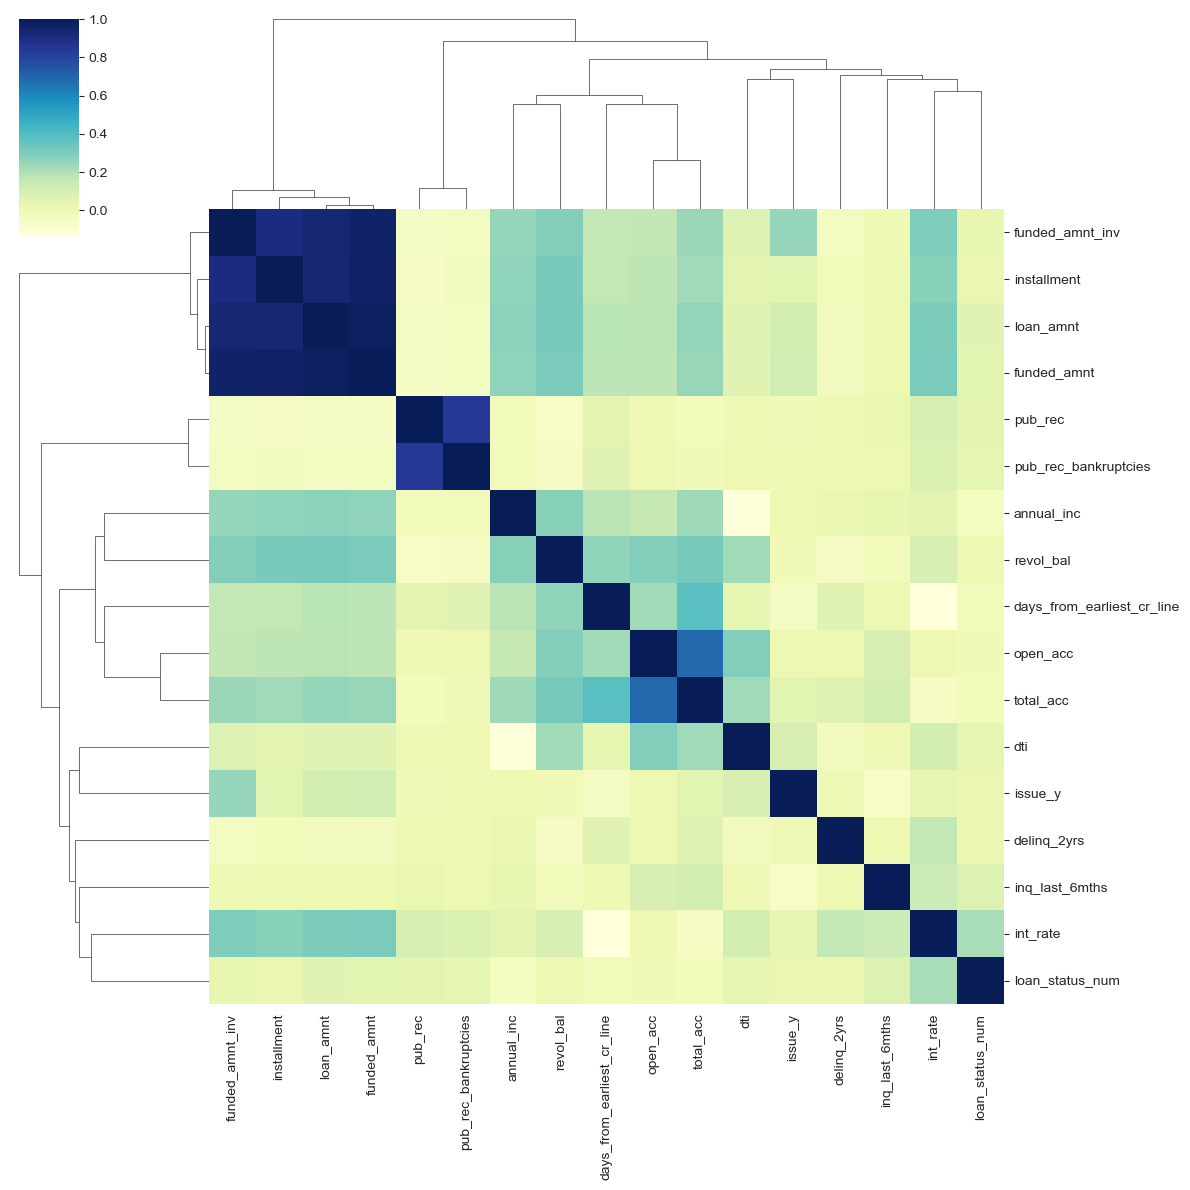

In [50]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

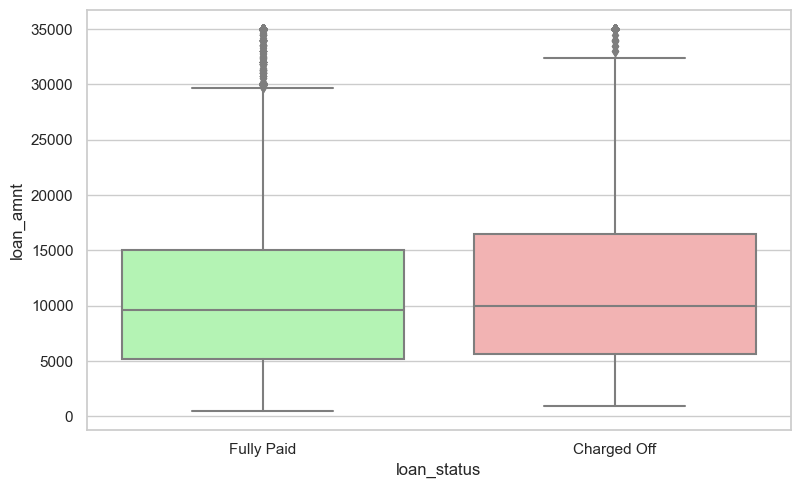

In [51]:
#Loan status vs Numerical continuous
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [52]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

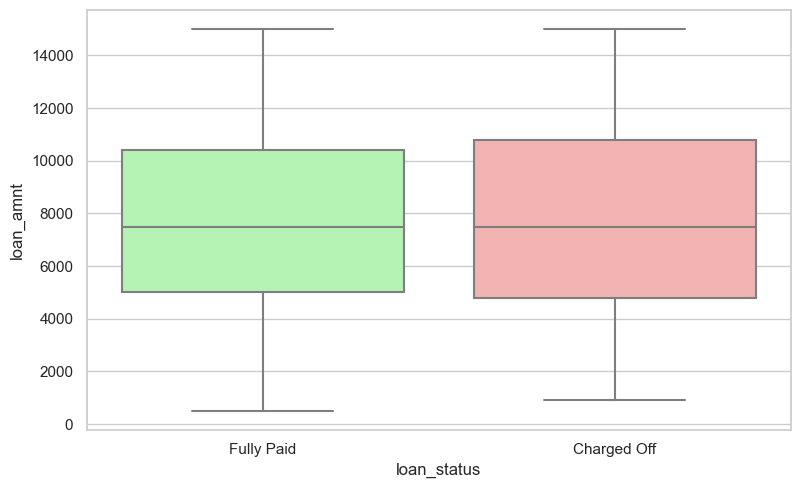

In [53]:
loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [54]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3 years,...,8,0,17813,85.60%,22,0.0,11,Dec,9258,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,...,7,0,32135,90.30%,38,0.0,11,Dec,14645,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2 years,...,8,0,13707,93.90%,31,0.0,11,Dec,7705,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,nyc transit,9 years,...,7,0,5872,57.60%,11,0.0,11,Dec,7098,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,...,12,0,23151,27.40%,26,0.0,11,Dec,15102,0


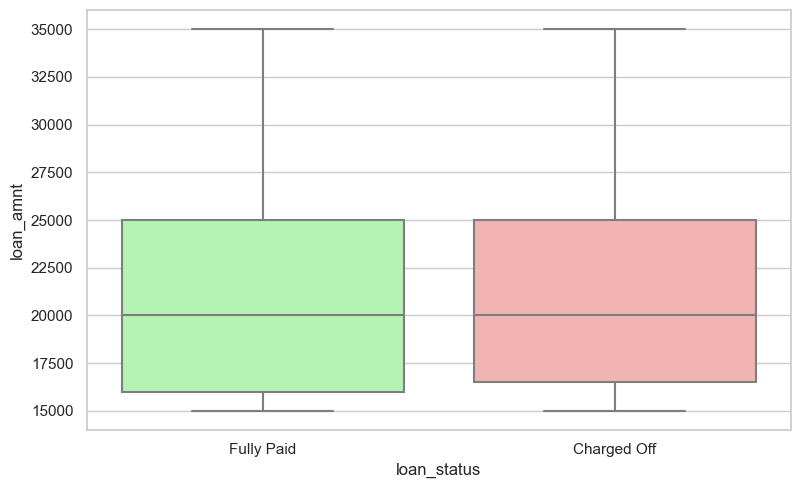

In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()